# Name= R.Ramakrishna Raju
# Batch= 09012021
## Topic:  Naïve Bayes
## PYTHON 

# importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing Dataset

In [2]:
df_test=pd.read_csv(r"F:\360\NB\SalaryData_Test.csv")
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
df_train=pd.read_csv(r"F:\360\NB\SalaryData_Train.csv")
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:>

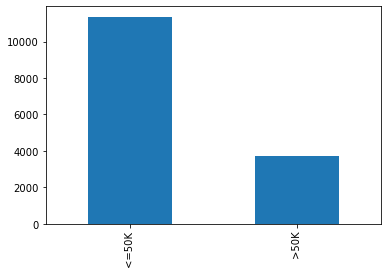

In [4]:
df_test['Salary'].value_counts().plot.bar()

# importing LabelEncoder for label encoding

In [35]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
from sklearn import preprocessing
for i in string_columns:
    number = preprocessing.LabelEncoder()
    df_train[i] = number.fit_transform(df_train[i])
    df_test[i] = number.fit_transform(df_test[i])
colnames = df_train.columns
len(colnames[0:13])
trainX = df_train[colnames[0:13]]
trainY = df_train[colnames[13]]
testX  = df_test[colnames[0:13]]
testY  = df_test[colnames[13]]  


In [36]:
testX

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [37]:
trainY

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

# spliting the data

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(trainX,trainY,train_size=0.80, random_state=0)

# applying naiveBayes classifier

In [68]:
# Perform Gaussian and Multinomial naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()


In [69]:
gnb.fit(trainX,trainY)


GaussianNB()

In [71]:
gnb_pred1=gnb.predict(testX)
gnb_pred1

array([0, 0, 0, ..., 0, 1, 0])

In [73]:
# confusion matrix
pd.crosstab(testY,gnb_pred1,rownames=['Actual'], colnames=['Prediction'])

Prediction,0,1
Actual,,
0,10759,601
1,2491,1209


In [74]:
# test accuracy for GaussainNB
from sklearn.metrics import accuracy_score

accuracy_score(sgnb_pred1,testY)


0.7946879150066402

In [75]:
gnb_pred2=gnb.predict(trainX)
gnb_pred2

array([0, 0, 0, ..., 0, 0, 1])

In [76]:
# confusion matrix
pd.crosstab(trainY,gnb_pred2,rownames=['Actual'], colnames=['Prediction'])

Prediction,0,1
Actual,,
0,21505,1148
1,5025,2483


In [88]:
#accuracy score for train GassianNB
accuracy_score(gnb_pred2,trainY)

0.7953317197705646

In [79]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [81]:
mnb_pred1=mnb.predict(testX)
mnb_pred1

array([0, 0, 0, ..., 0, 1, 0])

In [83]:
#confusion matrix for test
pd.crosstab(testY,mnb_pred1,rownames=['Actual'],colnames=['Prediction'])

Prediction,0,1
Actual,,
0,10891,469
1,2920,780


In [84]:
#test accurasy for MultinomialNB
accuracy_score(mnb_pred1,testY)

0.7749667994687915

In [85]:
mnb_pred2=mnb.predict(trainX)
mnb_pred2

array([1, 0, 0, ..., 0, 0, 1])

In [86]:
# confusion matrix for train
pd.crosstab(trainY,mnb_pred2,rownames=['Actual'],colnames=['Prediction'])

Prediction,0,1
Actual,,
0,21717,936
1,5913,1595


In [87]:
#train accuracy score for MultinomialNB
accuracy_score(mnb_pred2,trainY)

0.7729186698053778

In [ ]:
# Accuracy of Gaussian naive bayes is better than the MUltinomial naive bayes which is 79%
